In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we are going to use a new command (group by)
This command has the ability to use groups in pandas

SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2

In [3]:
df = pd.DataFrame({'key1': ['a', 'a', 'b', 'b', 'a'],
                   'key2': ['one', 'two', 'one', 'two', 'one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5)})
df

# key1,2 & data1,2 are the columns

,key1,key2,data1,data2
0,a,one,-0.905038,1.017951
1,a,two,-1.874766,1.016747
2,b,one,-0.155470,-1.153718
3,b,two,-0.644146,1.259383
4,a,one,0.206023,0.010246


In [4]:
# Using the group by
grouped = df.groupby('key1')

for name, group in grouped:
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.905038  1.017951
1    a  two -1.874766  1.016747
4    a  one  0.206023  0.010246
b
  key1 key2     data1     data2
2    b  one -0.155470 -1.153718
3    b  two -0.644146  1.259383


We can see that groupby command
Has grouped the data into a & b

In [5]:
grouped.mean() # takes the mean os the groups a & b for each column

,data1,data2
key1,,
a,-0.857927,0.681648
b,-0.399808,0.052833


In [6]:
grouped = df.groupby(['key1', 'key2'])

for (k1, k2), group in grouped:
    print(k1, k2)
    print(group)

a one
  key1 key2     data1     data2
0    a  one -0.905038  1.017951
4    a  one  0.206023  0.010246
a two
  key1 key2     data1     data2
1    a  two -1.874766  1.016747
b one
  key1 key2    data1     data2
2    b  one -0.15547 -1.153718
b two
  key1 key2     data1     data2
3    b  two -0.644146  1.259383


In [7]:
grouped.mean()

data1     data2
key1 key2                    
a    one  -0.349507  0.514098
     two  -1.874766  1.016747
b    one  -0.155470 -1.153718
     two  -0.644146  1.259383

One of the strong sides of using pandas is that it uses a hierarchical approach.
Meaning it first groups data into a and b and then into one and two

We can use the data from the restaraunts visits of New York

In [8]:
tips = pd.read_csv("tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
# We want to measure the tip depending on the total bil price

tips['tips_pct'] = tips['tip'] / tips['total_bill']
tips

# We can then store the answer of the division into a new columns and dispaly it

,total_bill,tip,sex,smoker,day,time,size,tips_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


   > We can then group these data depending whether its a male or female and if he/she smokes

In [12]:
grouped = tips.groupby(['sex', 'smoker'])

In [13]:
grouped.agg(['mean', 'std']) # this shows as the std and the mean 

total_bill                 tip                size            \
                    mean       std      mean       std      mean       std   
sex    smoker                                                                
Female No      18.105185  7.286455  2.773519  1.128425  2.592593  1.073146   
       Yes     17.977879  9.189751  2.931515  1.219916  2.242424  0.613917   
Male   No      19.791237  8.726566  3.113402  1.489559  2.711340  0.989094   
       Yes     22.284500  9.911845  3.051167  1.500120  2.500000  0.892530   

               tips_pct            
                   mean       std  
sex    smoker                      
Female No      0.156921  0.036421  
       Yes     0.182150  0.071595  
Male   No      0.160669  0.041849  
       Yes     0.152771  0.090588

We come back to the taxi problem

In [15]:
taxis = pd.read_csv("nyc_taxi_trip_data_sample.csv.zip")

Columns of interest:
1) pickup_datetime
2) dropoff_datetime

In [16]:
taxis.pickup_datetime # date and time that a person use the taxi

0          2013-10-04 20:20:00
1          2013-09-27 14:16:04
2          2013-07-18 13:24:37
3          2013-06-25 12:12:00
4          2013-04-19 05:28:00
                  ...         
1731792    2013-08-02 03:34:00
1731793    2013-02-21 12:44:00
1731794    2013-02-16 17:24:00
1731795    2013-05-24 10:29:16
1731796    2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: object

We can observe here that the (dtype) is object
Pandas hasnt figured out that the type of data has to be date and time
Hence we need to tell pandas how to read them

In [17]:
# We do that by  using (pase_dates) when the data are initially read from the file
taxis = pd.read_csv("nyc_taxi_trip_data_sample.csv.zip", 
                    parse_dates=['pickup_datetime', 'dropoff_datetime'])
taxis

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,037CB433AB5895649F7A9EF37F767EF1,F57FA13A6A82FE2F40D9DB0193DE0FEE,VTS,1,NaN,2013-10-04 20:20:00,2013-10-04 20:42:00,1,1320,4.05,-73.990089,40.723377,-73.941559,40.707790
1,E05E952B2DA14C7E9F1D7DEB80667739,11A3989B7BABB288FA3FA233E348C450,CMT,1,N,2013-09-27 14:16:04,2013-09-27 14:37:17,1,1273,2.10,-73.960022,40.710678,-73.994324,40.722858
2,51B267141807D0261EEB1844D2A78087,9DE60DFD683336F899D5BB448CE7CB09,CMT,1,N,2013-07-18 13:24:37,2013-07-18 13:29:27,3,290,0.90,-73.970634,40.760410,-73.960213,40.770241
3,76AC5C0F44D07BA5A2291F19E730B0B9,2348E03BB8227595281D9D6B38E45B38,VTS,1,NaN,2013-06-25 12:12:00,2013-06-25 12:28:00,2,960,1.28,-73.992661,40.752766,-73.975952,40.751781
4,739323AC15DADABE4B54561CB3330C53,9387A0902D7B1B4597802BE63AE7C34F,VTS,1,NaN,2013-04-19 05:28:00,2013-04-19 05:38:00,1,600,2.22,-73.999107,40.727924,-73.974869,40.741886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731792,5DAE4FE51457F5B4D4950D00A0AD4394,B76DC9DC874EB9D71CC04ABC0D9AAC6A,CMT,1,N,2013-08-02 03:34:00,2013-08-02 03:51:47,2,1067,6.00,-73.995766,40.764359,-73.920052,40.775574
1731793,3C16CFAD2B12F3508F7211C37F8F8B8F,A36B62F2B6D1D6C289519810E66EAAB9,VTS,1,NaN,2013-02-21 12:44:00,2013-02-21 13:11:00,6,1620,3.94,0.000000,0.000000,0.000000,0.000000
1731794,23E5F1FDC96168E865BF7B4427C0163B,E7D75D6D6F2DBD7D25578F02991193D9,VTS,1,NaN,2013-02-16 17:24:00,2013-02-16 17:30:00,3,360,2.15,-73.991554,40.726940,-73.971642,40.751362
1731795,FE44D1131D86D515C88D5296598DD35A,015615BB1B66BA269602ED1A867271FA,CMT,1,N,2013-05-24 10:29:16,2013-05-24 10:44:39,1,923,7.20,-73.865715,40.771168,-73.809006,40.700127


In [18]:
taxis.pickup_datetime

0         2013-10-04 20:20:00
1         2013-09-27 14:16:04
2         2013-07-18 13:24:37
3         2013-06-25 12:12:00
4         2013-04-19 05:28:00
                  ...        
1731792   2013-08-02 03:34:00
1731793   2013-02-21 12:44:00
1731794   2013-02-16 17:24:00
1731795   2013-05-24 10:29:16
1731796   2013-03-15 14:42:10
Name: pickup_datetime, Length: 1731797, dtype: datetime64[ns]

Hence now we can see that the dtype changed to datatime

Tip: When we have date and time calculations everything can be done through the use of libaries

To check when do newyorkers take taxis , we can check the most frequent weeks


In [19]:
weekly = taxis.groupby(taxis.pickup_datetime.dt.isocalendar().week) # use group by depending on pickup_datetime and output week
len(weekly) # hence 52 outcomes

52

In [20]:
y = weekly.size() # data of each ween
y.head(3) # display the first 3 weeks

week
1    35125
2    32415
3    34478
dtype: int64

<AxesSubplot:>

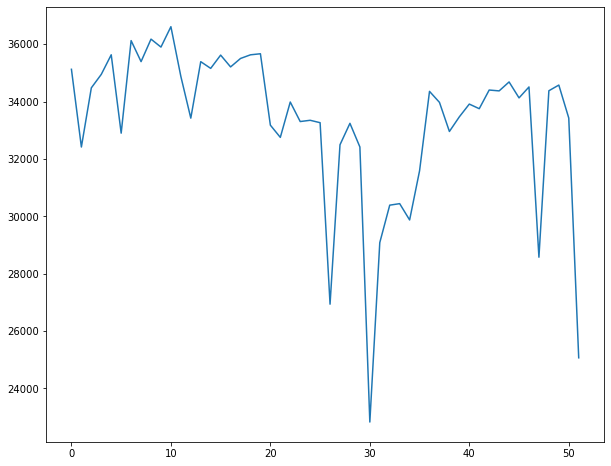

In [21]:
pd.Series(y.values).plot(figsize=(10, 8)) # display weeks on a diagram

Eventhough the data and the graph is correct .
The way the data are displayed is not very useful, for example what has happend in week 13 , which month does week 13 belong to ?

In [23]:
x = weekly.pickup_datetime.min() # for each weekly group --> take the min date and time --> Hence 1st route
x[:3]

week
1   2013-01-01 00:00:00
2   2013-01-07 00:00:29
3   2013-01-14 00:00:00
Name: pickup_datetime, dtype: datetime64[ns]

We can see from the above data that the 1st week of 2013 had only 6 days instead of 7. Hence 1/01/2013 was a Tuesday

In [27]:
# This can be shown by using loc
x.loc[1].day_name()

'Tuesday'

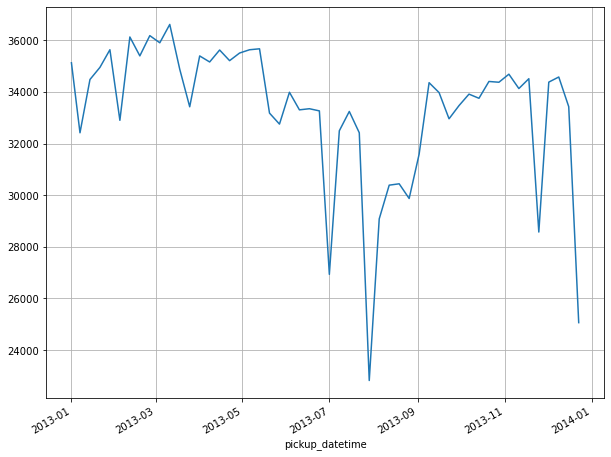

In [28]:
# Display the new diagram with the new data
pd.Series(y.values, index=x).plot(figsize=(10, 8))
plt.grid()

 We have seen which month has the most routes
 Lets find out which day in weeks has the most routes

In [29]:
dayofweek_rides = taxis.groupby(taxis.pickup_datetime.dt.dayofweek) # use group by and dt.dayofweek
len(dayofweek_rides)

7

In [32]:
day_of_week_rides_num = dayofweek_rides.size()
day_of_week_rides_num
# 0 --> Monday

pickup_datetime
0    224342
1    246768
2    249750
3    255900
4    263773
5    262127
6    229137
dtype: int64

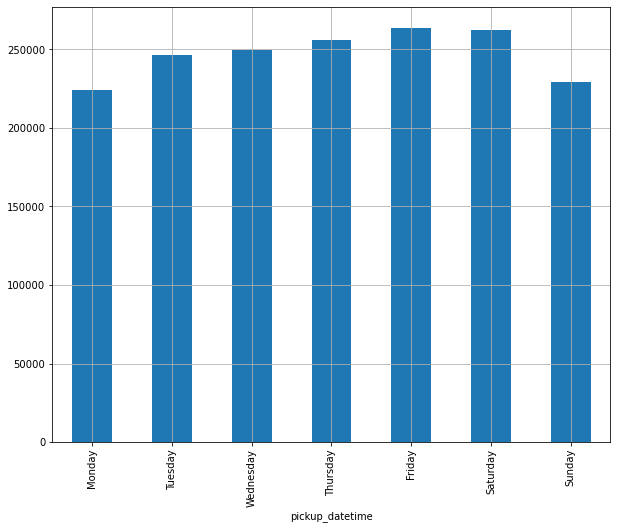

In [33]:
# Display data on a bar plot
day_of_week_rides_num.plot(kind='bar', figsize=(10, 8))
plt.gca().set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']) # set 0,1,.. to Monday,Tuesday..
plt.grid()

In [34]:
# Hour depending
hourly_rides = taxis.groupby(taxis.pickup_datetime.dt.hour)
len(hourly_rides)

24

In [35]:
hourly_rides_num = hourly_rides.size()
hourly_rides_num

pickup_datetime
0      69279
1      50967
2      38098
3      27537
4      20058
5      17475
6      35918
7      62327
8      77968
9      80253
10     78149
11     80642
12     85324
13     84133
14     86588
15     83057
16     69029
17     83954
18    104198
19    108802
20    103391
21    100562
22     97859
23     86229
dtype: int64

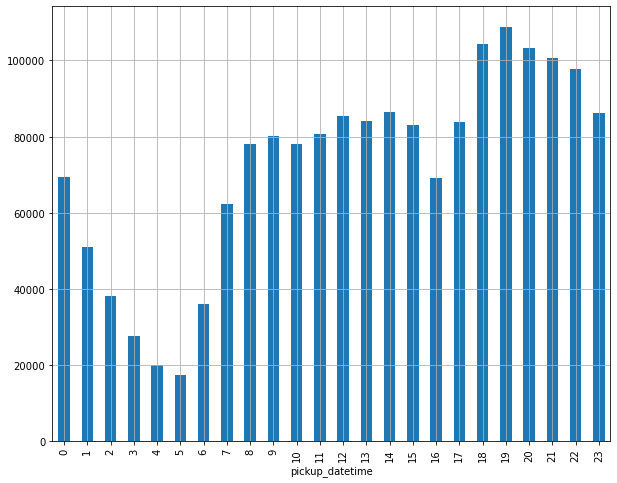

In [36]:
# Plotting a bar plot
hourly_rides_num.plot.bar(figsize=(10, 8))
plt.grid()

Hence in the city that Never Sleeps , we can see from the above data that at 5 the taxi has less the routes
Whereas on Monday the routes are at their max